![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [5]:
df.shape

(541462, 3)

<Axes: >

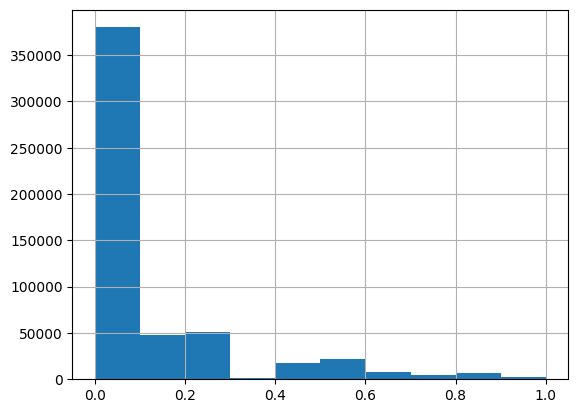

In [6]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:

# Creación de matrices de documentos usando CountVectorizer a partir de X, volviendo todas la palabras en minúscula
count_vectorizer = CountVectorizer(lowercase=True)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:
# Modificar las variables de int64 a int16
X_train_count = X_train_count.astype('int16')
X_test_count = X_test_count.astype('int16')

In [ ]:
# Entrenamiento de un modelo de regresión con penalización Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_count, y_train)

# Evaluación del modelo RidgeCV
y_pred_ridge = ridge.predict(X_test_count)
MSE_CountVec = metrics.mean_squared_error(y_test, y_pred_ridge)
RMSE_CountVec = np.sqrt(MSE_CountVec)

print(f"MSE", f'{MSE_CountVec:.4f}')
print(f"RMSE", f'{RMSE_CountVec:.4f}')

MSE 0.0261
RMSE 0.1616


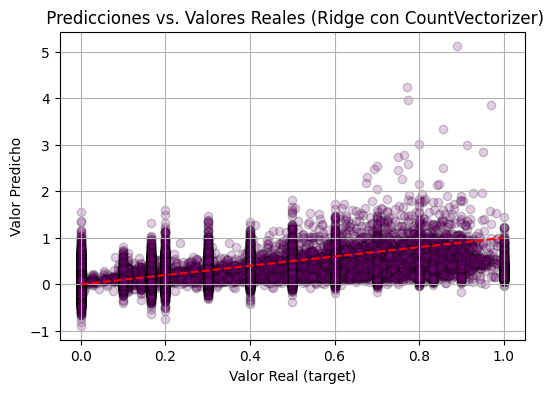

In [13]:
# Gráfica de dispersión: valores reales vs. predichos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_ridge, alpha=0.2, color='purple', edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Valor Real (target)')
plt.ylabel('Valor Predicho')
plt.title(' Predicciones vs. Valores Reales (Ridge con CountVectorizer)')
plt.grid()
plt.show()

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
countvec_trigramas = CountVectorizer(ngram_range=(3, 3), lowercase=True)
X_train_count_trigramas = countvec_trigramas.fit_transform(X_train)
X_test_count_trigramas = countvec_trigramas.transform(X_test)

In [15]:
# Modificar de int64 a int16
X_train_trigramas = X_train_count_trigramas.astype('int16')
X_test_trigramas = X_test_count_trigramas.astype('int16')

In [16]:
# Entrenamiento de modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_trigramas, y_train)

# Evaluación del modelo Ridge
y_pred_trigramas = ridge.predict(X_test_trigramas)
MSE_Trigramas = metrics.mean_squared_error(y_test, y_pred_trigramas)
RMSE_Trigramas = np.sqrt(MSE_Trigramas)

print(f"MSE", f'{MSE_Trigramas:.4f}')
print(f"RMSE", f'{RMSE_Trigramas:.4f}')

MSE 0.0368
RMSE 0.1918


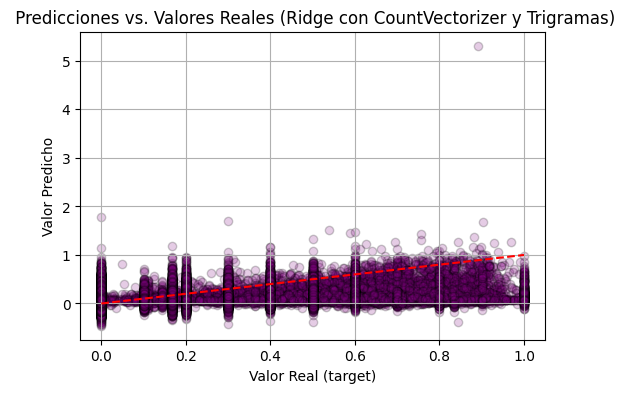

In [17]:
# Gráfica de dispersión: valores reales vs. predichos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_trigramas, alpha=0.2, color='purple', edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Valor Real (target)')
plt.ylabel('Valor Predicho')
plt.title(' Predicciones vs. Valores Reales (Ridge con CountVectorizer y Trigramas)')
plt.grid()
plt.show()

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Función TfidfVectorizer
##### Concepto
Es una técnica de Tokenización y representación de texto que transforma un texto en una matriz de valores numéricos, basados en el cálculo de: 
* Term Frequency (TF): Frecuencia de una palabra (cuántas veces aparece una palabra en el texto)
* Inverse Document Frequency (IDF): Frecuencia inversa (qué tan rara es una palabra en todo el texto).
* Producto cruzado de las frecuencias: TF-IDF: Importancia de una palabra en un texto, relativa a su presencia en el corpus completo
##### Comparado contra 'CountVectorizer'
* Tiene relevancia semántica: distingue mejor la importancia de relativa de las palabras
* Permite análisis más profundos de las palabras
* Permite trabajar en grupos desbalanceados (textos con altas repeticiones de palabras)
* Es especialmente útil para modelos de clasificación de texto
##### Estructura y parámetros
Algunos de los parámetros más importantes de esta función: 
* input - Tipo de entrada: 'content' (texto), 'file' (documentos), 'array' (lista de cadenas)
* decode_error - Errores de decodificación: 'ignore' (ignorar), 'replace' (reemplaza no válidos con un marcador), 'strict' (muestra el error)
* strip_accents - eliminar acentos de caracteres: 'ascii' (conviernte a ASCII), 'none' (no eliminarlos)
* lowercase - Convierte todo el texto a minúsculas antes de tokenizar (por defecto = True)
* stop_words - Filtrar palabras comunes que no aportan valor informativo: 'none' (sin filtrar), 'english' (comunes en inglés: the, and, is, etc), 'Lista generada por el usuario' 
* token_pattern - Patrón de tokenización: cómo dividir el texto en palabras, por defecto divide cualquier palabra cuando se tienen al menos dos caracteres (r'\b\w\w+\b').
* ngram_range - rango de n-gramas a utilizar: '(1,1)' (unigramas), '(1,2)' (unigramas como bigramas),'(2,2)' (bigramas).
* max_df - Máxima frecuencia con la que se incluye un término, si aparece en más del valor definido el término se ignora. (por defecto = 1.0)
* min_df - Minima frecuencia necesaria para ser incluida en la matriz de características, si el término no aparece el número mínimo de veces, se elimina.
* max_features - limita el número de características a las más frecuentes o relevantes (si se establece un número, solo se consideran las n palabras más frecuentes (por defecto = none))
* use_idf - si se usa o no IDF (si se establece False, el modelo solo utilizará TF para la representación del texto)
* smooth_idf - Si se suaviza el cálculo del idf, se evita la división por cero cuando un texto aparece en todos los documentos
* sublinear_tf - Transformación logarítmica en la frecuencia de término en lugar de frecuencia directa (TF = 1 + log (Frecuencia)): Reduce el impato de palabras que se repiten muchas veces en un solo documento.
##### Limitaciones
* No captura significado contextual
* Sensible a palabras raras (da mucho peso a términos infrecuentes)

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Vectorización del texto con TfidfVectorizer
tfidf = TfidfVectorizer(
    input='content', 
    encoding='utf-8', 
    decode_error='ignore', 
    strip_accents=None, 
    lowercase=True, 
    stop_words=None, 
    token_pattern=r'\b\w\w+\b', 
    ngram_range=(1, 1), 
    max_df=1.0, 
    min_df=1, 
    max_features=None, 
    use_idf=True, 
    smooth_idf=True, 
    sublinear_tf=False
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)  # importante: solo transform en test

# Entrenamiento del modelo de regresión (Ridge recomendado para regularización)
modelo_regresion = Ridge()
modelo_regresion.fit(X_train_tfidf, y_train)

# Predicciones
y_pred_regresion = modelo_regresion.predict(X_test_tfidf)

# Evaluación con MSE
MSE_Tfidf = mean_squared_error(y_test, y_pred_regresion)
print(f" MSE : {MSE_Tfidf:.4f}")

 MSE : 0.0181


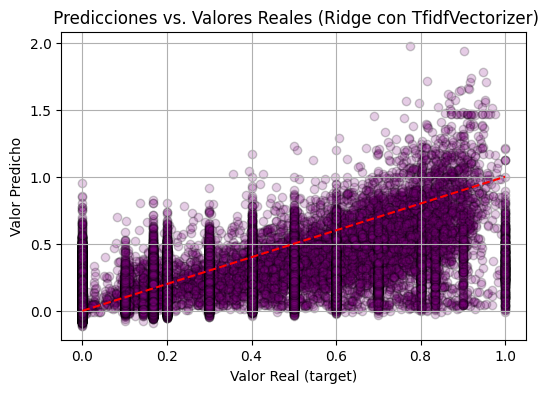

In [19]:
# Gráfica de dispersión: valores reales vs. predichos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_regresion, alpha=0.2, color='purple', edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Valor Real (target)')
plt.ylabel('Valor Predicho')
plt.title(' Predicciones vs. Valores Reales (Ridge con TfidfVectorizer)')
plt.grid()
plt.show()

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

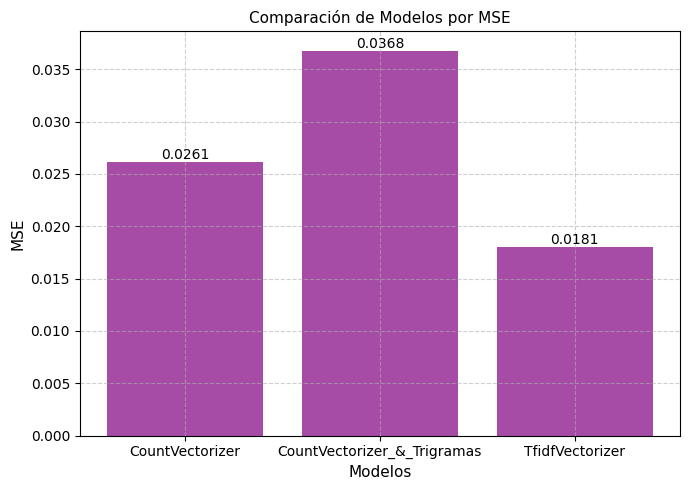

In [33]:
### Punto 5.1 - Comparación y análisis de resultados
modelos = ['CountVectorizer', 'CountVectorizer_&_Trigramas', 'TfidfVectorizer']
MSE = [MSE_CountVec, MSE_Trigramas, MSE_Tfidf]

fig, ax = plt.subplots(figsize=(7, 5))

# Color púrpura
purple_color = '#800080'

# Gráfico: Comparar modelos por MSE
bars = ax.bar(modelos, MSE, color=purple_color, alpha=0.7)
ax.set_title('Comparación de Modelos por MSE', fontsize=11)
ax.set_xlabel('Modelos', fontsize=11)
ax.set_ylabel('MSE', fontsize=11)
ax.grid(True, linestyle='--', alpha=0.6)

# Mostrar el valor arriba de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.4f}', 
            ha='center', va='bottom', fontsize=10)

# Ajustes finales
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
Luego de implementar los métodos CountVectorizer, CountVectorizer con trigramas y TfidfVectorizer y evaluar su desempeño por medio del MSE, los resultados mostraron cómo el preprocesamiento del texto afecta significativamente el rendimiento del modelo. Se destaca que técnicas como TfidfVectorizer pueden capturar mejor la importancia relativa de las palabras en el corpus, lo que resulta en predicciones más precisas.<p>
<p style="text-align: justify;">
Los resultados del MSE para cada método fueron los siguientes: utilizando CountVectorizer, el MSE fue de 0.0261; con CountVectorizer y trigramas, el MSE aumentó ligeramente a 0.0368; mientras que con TfidfVectorizer, el MSE fue el más bajo, alcanzando 0.0181. Esto demuestra que TfidfVectorizer logró un mejor desempeño al capturar la importancia relativa de las palabras en el corpus.<p>